Importing all libraries required in this notebook

In [33]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [34]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  

In [35]:
data = pd.read_csv("student_scores - student_scores.csv")

In [36]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [37]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


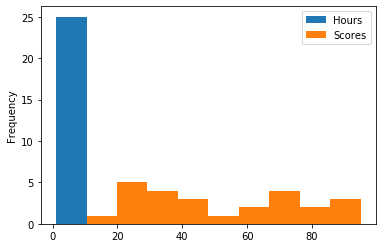

In [39]:
data.plot.hist()

Plotting the distribution of scores

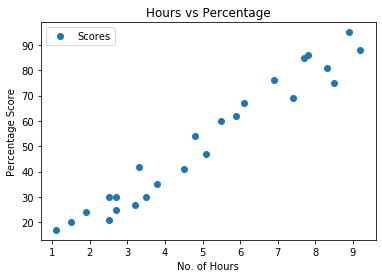

In [40]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

Preparing given data

In [41]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

 split this data into training and test sets

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


Plotting the regression line

In [44]:
line = regressor.coef_*X+regressor.intercept_

Plotting for the test data

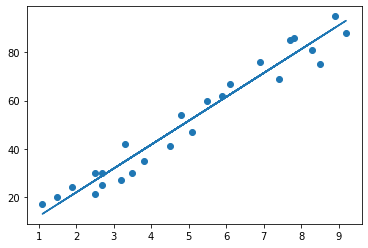

In [45]:
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

# Making Predictions

In [46]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing Actual vs Predicted

In [47]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


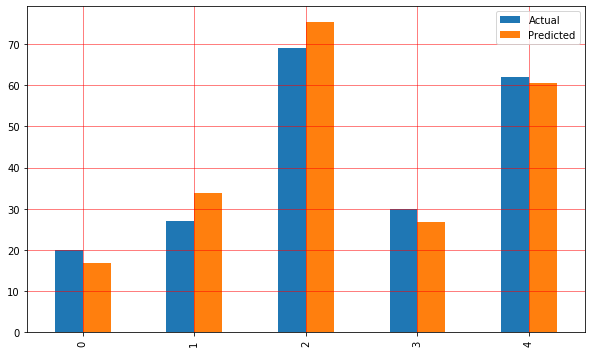

In [48]:
df.plot(kind="bar",figsize=(10,6))
plt.grid(which="major",linestyle="-",linewidth='0.5',color="red")
plt.grid(which="minor",linestyle=":",linewidth='0.5',color="black")
plt.show()

test with your own data

In [49]:
hours = [[9.25]]

In [50]:
own_pred = regressor.predict(hours)

In [51]:
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [52]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002975
